# K-Means 분할적 군집화
---
- 지정된 K만큼 임의의 중심점을 지정
- 중심점을 기준으로 가까운 거리에 있는 데이터를 하나의 군집으로 묶기
- 군집마다 다시 중심점을 계산
- 중심점 이동이 더 이상 변경되지 않을때까지 반복하는 방법

In [10]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-white')

## [1] 데이터 로딩 및 준비

In [11]:
iris = load_iris()

iris_data = iris.data
iris_data.shape

(150, 4)

In [12]:
from sklearn.decomposition import PCA

iris_data_pca = PCA(2).fit_transform(iris_data)

In [13]:
from sklearn.preprocessing import StandardScaler

iris_data_scaled = StandardScaler().fit_transform(iris_data_pca)

In [14]:
iris_data_scaled.shape

(150, 2)

## [2] 데이터 처리

In [15]:
iris_cluster =KMeans(n_clusters=2).fit(iris_data_scaled)

iris_cluster_trans = iris_cluster.transform(iris_data_scaled)

## [3] 시각화

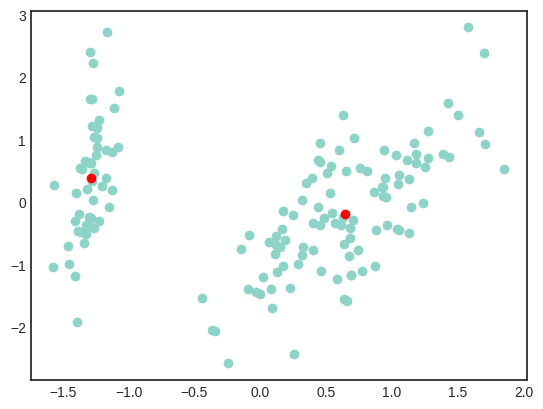

In [16]:
plt.scatter(iris_data_scaled[:, 0], iris_data_scaled[:, 1])
plt.plot(iris_cluster.cluster_centers_[0][0], iris_cluster.cluster_centers_[0][1], "ro", label="c1")
plt.plot(iris_cluster.cluster_centers_[1][0], iris_cluster.cluster_centers_[1][1], "ro", label="c1")
plt.show()

In [17]:
print("cluster centers : ", iris_cluster.cluster_centers_)
print("labels : ", iris_cluster.labels_)
print("labels labels counts : ", np.unique(iris_cluster.labels_, return_counts=True))
print("inertia : ", iris_cluster.inertia_)
print("n_iter : ", iris_cluster.n_iter_)

cluster centers :  [[ 0.64467926 -0.19439527]
 [-1.28935852  0.38879054]]
labels :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
labels labels counts :  (array([0, 1], dtype=int32), array([100,  50]))
inertia :  163.97973897817553
n_iter :  5


In [22]:
def draw_plot(data, max_k):
    x = []
    y = []
    for i in range(1, max_k +1):
        cluster =KMeans(n_clusters=i).fit(data)
        num = cluster.inertia_
        x.append(i)
        y.append(num)
    plt.figure(figsize=(10,7))
    plt.plot(x, y)
    plt.show()

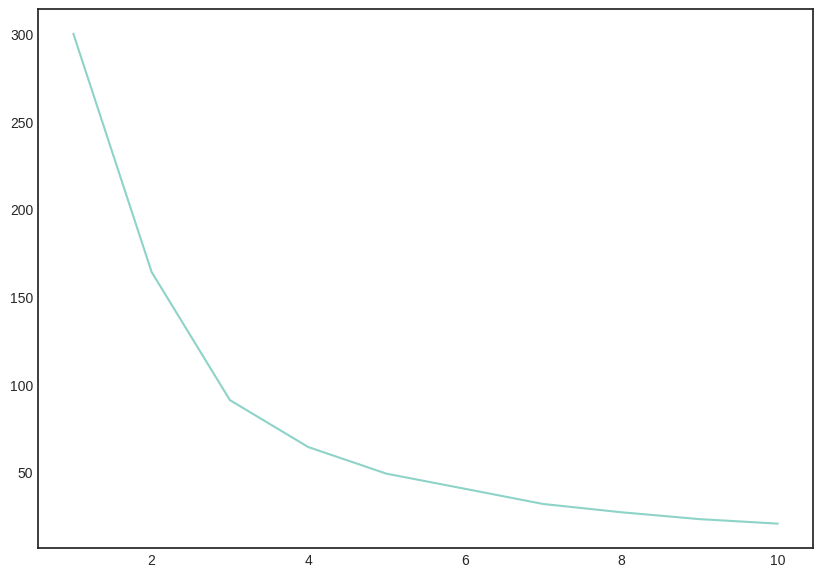

In [23]:
draw_plot(iris_data_scaled, 10)

## [4] 모델 평가